In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns

In [2]:
train_set = pd.read_csv(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\cosmic_disaster\train.csv')
test_set = pd.read_csv(r'C:\Users\Ismat\OneDrive\Рабочий стол\document\etc\lesson_course\projects\cosmic_disaster\test.csv')

In [3]:
train_set['Transported'][train_set['Transported']==True]=1
train_set['Transported'][train_set['Transported']==False]=0

features=['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
target = ['Transported']

train_set_featured=pd.get_dummies(train_set[features])
from sklearn.impute import KNNImputer
imputer = KNNImputer()
train_imputed=imputer.fit_transform(train_set_featured)
train_imputed=pd.DataFrame(train_imputed)

test_set_featured=pd.get_dummies(test_set[features])
from sklearn.impute import KNNImputer
imputer = KNNImputer()
test_imputed=imputer.fit_transform(test_set_featured)
test_imputed=pd.DataFrame(test_imputed)

X = train_imputed
y = train_set[target].astype('int')
prediction=test_imputed

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 47)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
scaled_prediction=sc.fit_transform(prediction)

C:\Users\Ismat\AppData\Local\Temp\ipykernel_26180\3672547886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Transported'][train_set['Transported']==True]=1


In [27]:
def batch(n):
    l=[]
    for i in range (1,n+1):
        if n%i==0:
            l+=[i]
    return l;
batch(3263)

[1, 13, 251, 3263]

In [25]:
%%time
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='binary_crossentropy',mode='min')

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

ann.add(tf.keras.layers.Dense(units=25, activation='relu'))

ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

ann.add(tf.keras.layers.Dense(units=25, activation='relu'))

ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, batch_size = 164, epochs =1000 ,callbacks=[early_stop])

Epoch 1/1000
40/40 [==============================] - 1s 2ms/step - loss: 0.6131 - accuracy: 0.7108
Epoch 2/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7227
Epoch 3/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7299
Epoch 4/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7323
Epoch 5/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.7375
Epoch 6/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7444
Epoch 7/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7501
Epoch 8/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.7539
Epoch 9/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7593
Epoch 10/1000
40/40 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7609

In [7]:
ann_dff=pd.DataFrame(ann.history.history)
ann_dff

,loss,accuracy
0,0.731657,0.448228
1,0.710617,0.460193
2,0.696992,0.549778
3,0.686782,0.569106
4,0.678379,0.580304
...,...,...
995,0.428458,0.792913
996,0.428661,0.793066
997,0.428498,0.793680
998,0.428695,0.793833


<AxesSubplot:>

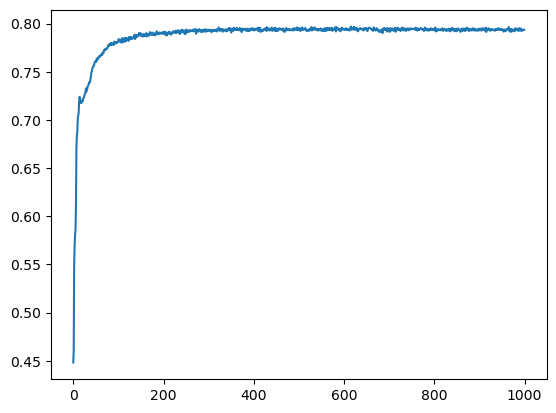

In [8]:
ann_dff['accuracy'].plot()

<AxesSubplot:>

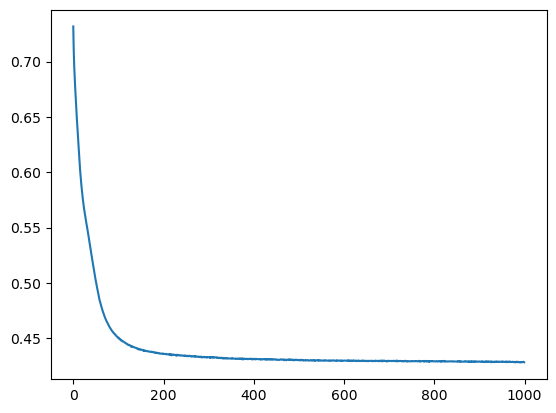

In [9]:
ann_dff['loss'].plot()

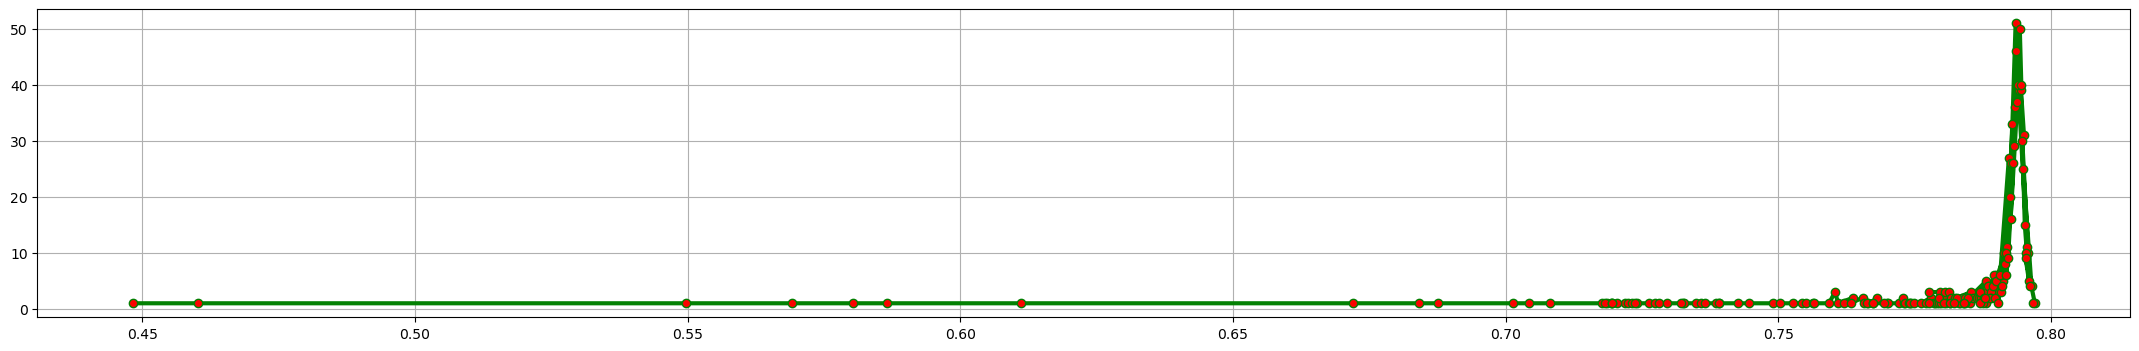

In [10]:
data=ann_dff['accuracy'].value_counts(sort=False)
plt.rcParams['figure.figsize']=27,4
plt.grid()
plt.plot(ann_dff['accuracy'].value_counts(sort=False),color='green',linewidth=3,alpha=.99,linestyle='-',
         marker='o',markersize=6, markerfacecolor='red',markeredgewidth=1)
#plt.plot(round(data),color='green',linewidth=3,alpha=.99,
#linestyle='-',marker='o',markersize=10, markerfacecolor='red',markeredgewidth=3)

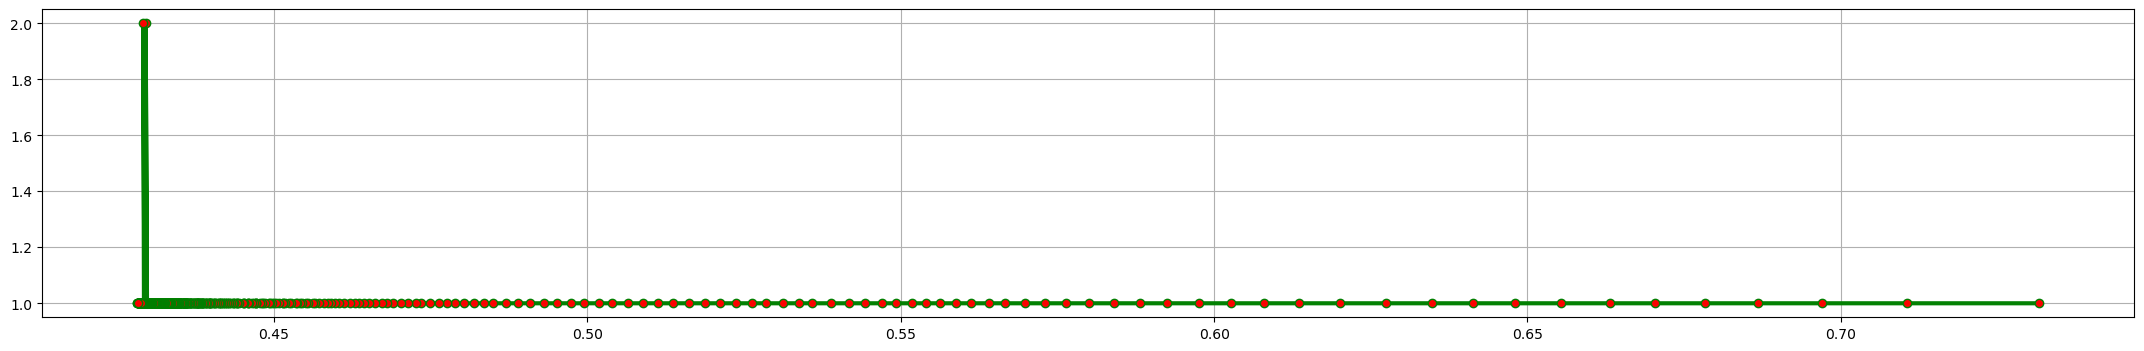

In [11]:
import matplotlib.pyplot as plt
data=ann_dff['loss'].value_counts(sort=False)
plt.rcParams['figure.figsize']=27,4
plt.grid()
plt.plot(ann_dff['loss'].value_counts(sort=False),color='green',linewidth=3,alpha=.99,linestyle='-',
         marker='o',markersize=6, markerfacecolor='red',markeredgewidth=1)
#plt.plot(round(data),color='green',linewidth=3,alpha=.99,
#linestyle='-',marker='o',markersize=10, markerfacecolor='red',markeredgewidth=3)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

ann_prediction = ann.predict(X_test)

ann_prediction = (ann_prediction > 0.5)

submission=ann.predict(scaled_prediction)

submission = (submission > 0.5)

# output = pd.DataFrame({'PassengerId': data_frame_test.PassengerId, 'Survived':  list(np.array(submission))})

# output['Survived'][output['Survived']==True]=1

# output['Survived'][output['Survived']==False]=0

# output.to_csv('ann.csv', index=False)

# print("Your submission was successfully saved!")

# print(accuracy_score(y_test, ann_prediction))

print(classification_report(y_test, ann_prediction))

134/134 [==============================] - 0s 749us/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1077
           1       0.79      0.84      0.82      1097

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174



In [13]:
output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Transported':  np.ravel(submission)})

# output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Transported': submission})

# output['Transported'][output['Transported']==1]=True
# output['Transported'][output['Transported']==0]=False
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [14]:
output.to_csv('ANN.csv', index=False)

In [15]:
from tensorflow.keras.models import load_model

In [16]:
ann.save('cosmic_titanic_nn.h5')

In [17]:
for_later_using = load_model('cosmic_titanic_nn.h5')

In [19]:
# for_later_using.predict('scaled_cleaned_data')